# Neural Network Regression

Regression problem - predicting a numerical variable based on some other combinations of variables, even shorter... predicting a number.

### Create data to view and fit

In [101]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [102]:
# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.]) 

# Create labels
Y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

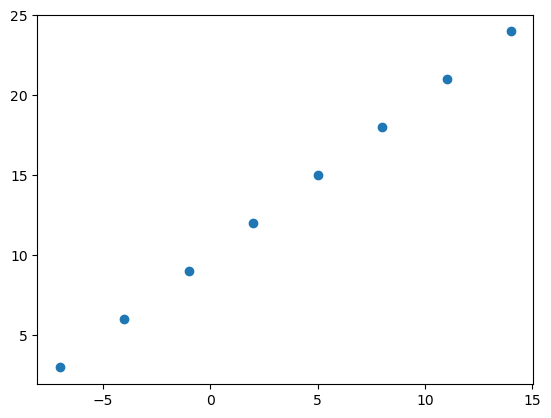

In [103]:
# Visualize it
plt.scatter(X,Y)

In [104]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [105]:
# Create a demo tensor for our housing price prediction
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [106]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [107]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
Y = tf.cast(tf.constant(Y), dtype = tf.float32)
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [108]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling with tensorflow

1. Creating the model - define input, output and hidden layers.
2. Compiling the model - define the loss function (the function which tells out model how wrong it is), and the optimizer (tells our model how to improve the patterns it is learning), and evaluation metrics (what we can use to improve the performance of our model).
3. Fitting a model - letting the model try to find patterns between X and Y.

### Create, compile and fit the model

In [110]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# (1) in Dense means that we use one number as input and obtain one number as output

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,   # mae - means the mean absolute error
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              #optimizer = tf.keras.optimizers.SGD(),    # SGD - stochastic gradient descent
              metrics = ['mae']
             )

# 3. Fit the model
# Note that ndim must be 2, not 1, so we have to reshape the tensors
X = tf.reshape(X, shape=(8, 1))
Y = tf.reshape(Y, shape=(8, 1))
X, Y

model.fit(X, Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - loss: 14.0571 - mae: 14.0571
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.2855 - mae: 8.2855
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 12.7214 - mae: 12.7214
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.2653 - mae: 11.2653
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.7598 - mae: 7.7598
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.6226 - mae: 7.6226
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.6016 - mae: 8.6016
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.7292 - mae: 8.7292
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.2808 - mae: 8.2808
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.3850 - mae: 7.3850
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0808 - mae: 6.0808
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.4134 - mae: 6.4134
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [111]:
a = np.array([[17.0]]).astype('float32')
model.predict(a)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[26.311317]], dtype=float32)

We can improve the model by doing the following changes:

In step 1. (creating the model):
- we might add more layers
- increase the number of hidden units (neurons) within each of the hidden layer
- change the activation function of each layer
In the step 2. (compiling the model):
- we may change the optimization function
- or the learning rate of the optimization function
In the step 3. (fitting a model):
- we may fit the model for more epochs (increasing the training time)
- give the model more data

### Evaluate the model - visualize

We may be interested in:
- how the data look like
- how the model look like
- how the model performs when it learns
- how the predictions of the model line up against the ground truth 

In [117]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X = tf.reshape(X, shape=(50,1))
X = tf.cast(X, dtype=tf.float32)

Y = X + 10

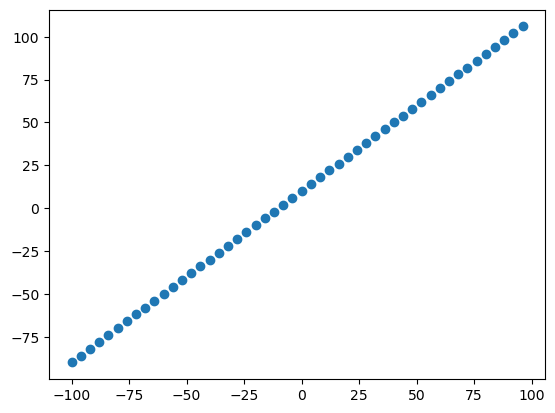

In [121]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, Y)

### The concept of 3 sets (or 2): 

- training set (70-80% of all data)
- validation set, where we tweak the model (10-15%)
- test set (10-15%)

we can ignore the validation set

In [124]:
# Split the data into train and test datasets
X_train = X[:40]   # this is 80% of the data
X_test = X[40:]   # this is 20% of the data
Y_train = Y[:40]
Y_test = Y[40:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

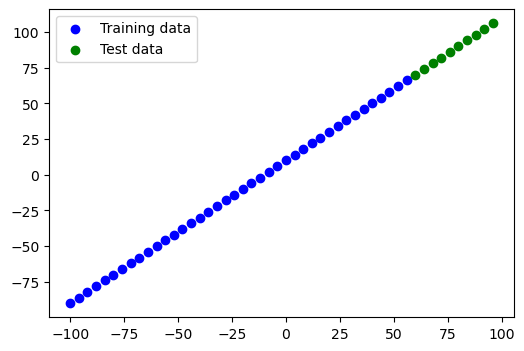

In [128]:
# Visualize the data
plt.figure(figsize=(6, 4))
plt.scatter(X_train, Y_train, c='b', label='Training data')
plt.scatter(X_test, Y_test, c='g', label='Test data')
plt.legend()

### Build a neural network for our data

In [138]:
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=['mae'])



In [139]:
# Visualize the model
model.summary()

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_71 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [140]:
# Fit the model
model.fit(X_train, Y_train, epochs=100, verbose=0)